# System wieloagentowy - analityka

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Biblioteki załadowane.")

Biblioteki załadowane.


In [49]:
try:
    base_path = os.path.join("data")

    df_steps = pd.read_csv(os.path.join(base_path, "analytics_steps.csv"))
    df_deliveries = pd.read_csv(os.path.join(base_path, "analytics_deliveries.csv"))
    heatmap_grid = np.load(os.path.join(base_path, "analytics_heatmap.npy"))
    
except FileNotFoundError:
    print("Błąd: Nie znaleziono plików danych. Uruchom najpierw symulację (main.py).")

## Jak Agenci radzili sobie z czasem

### Wykres 1: Sumaryczna nagroda w czasie

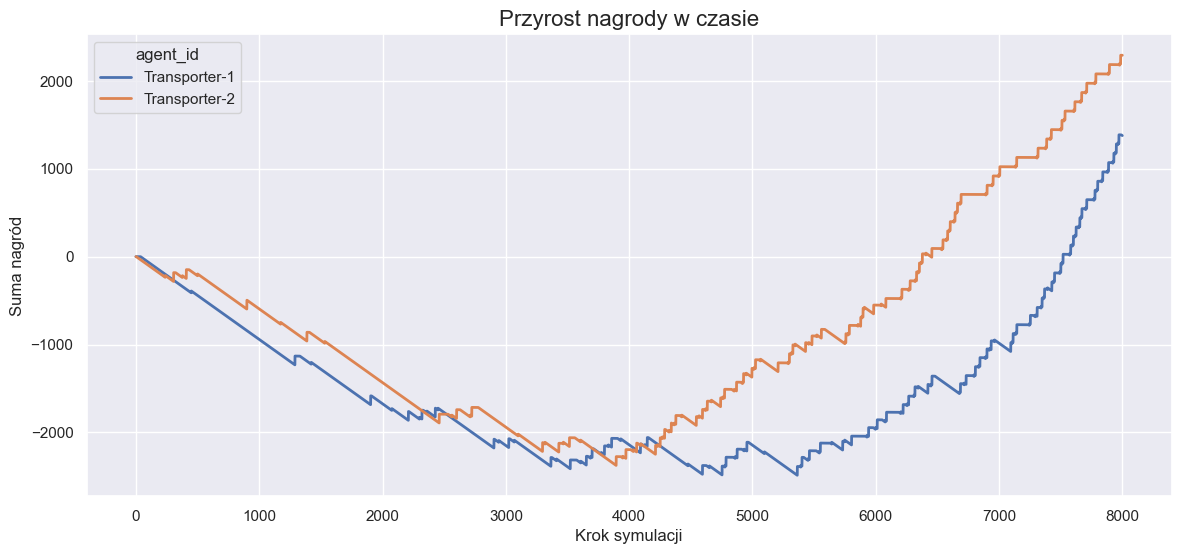

In [50]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_steps, x="step", y="total_reward", hue="agent_id", linewidth=2)
plt.title("Przyrost nagrody w czasie", fontsize=16)
plt.xlabel("Krok symulacji")
plt.ylabel("Suma nagród")
plt.show()



### Wykres 2: Spadek metryki Epsilon 


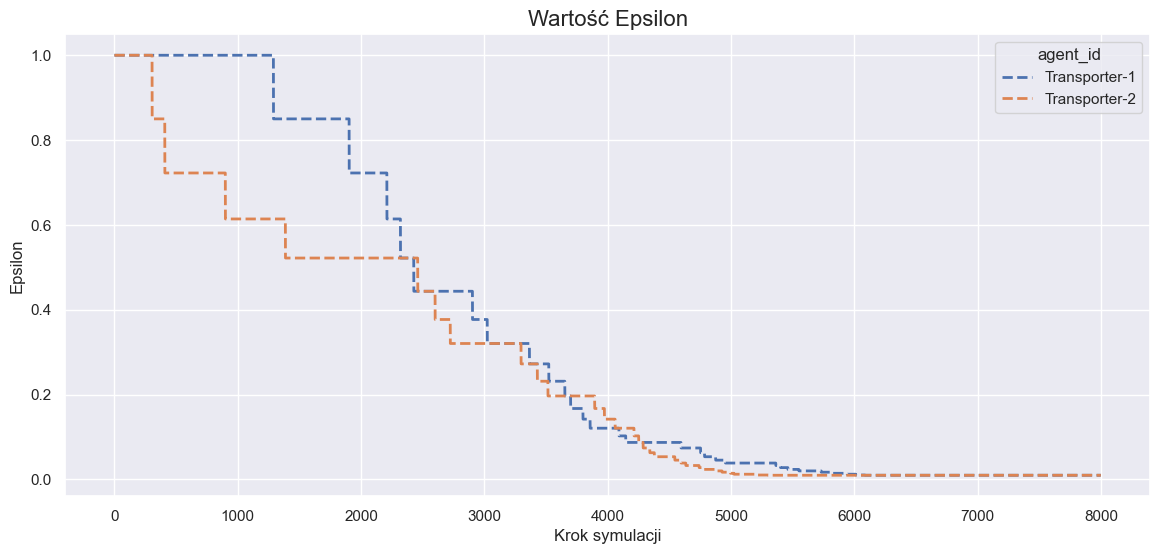

In [51]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_steps, x="step", y="epsilon", hue="agent_id", linewidth=2, linestyle="--")
plt.title("Wartość Epsilon", fontsize=16)
plt.xlabel("Krok symulacji")
plt.ylabel("Epsilon")
plt.show()

## Analiza efektywności realizowanych zamówień

### Wykres 3: Bląd estymacji agentów (rzeczywisty czas dostawy vs estymowany)

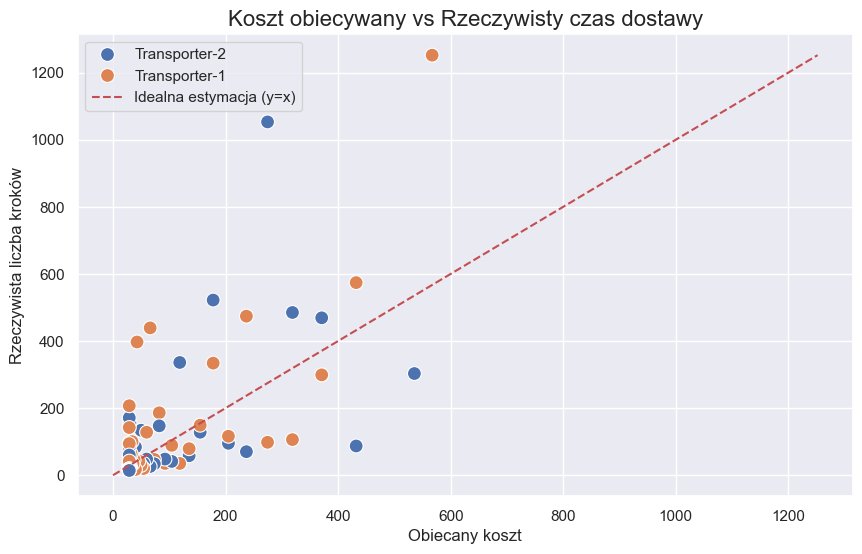

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_deliveries, x="promised_cost", y="steps_taken", hue="agent_id", s=100)

max_val = max(df_deliveries["promised_cost"].max(), df_deliveries["steps_taken"].max())
plt.plot([0, max_val], [0, max_val], 'r--', label="Idealna estymacja (y=x)")

plt.title("Koszt obiecywany vs Rzeczywisty czas dostawy", fontsize=16)
plt.xlabel("Obiecany koszt")
plt.ylabel("Rzeczywista liczba kroków")
plt.legend()
plt.show()


### Wykres 4: Histogram czasu dostaw

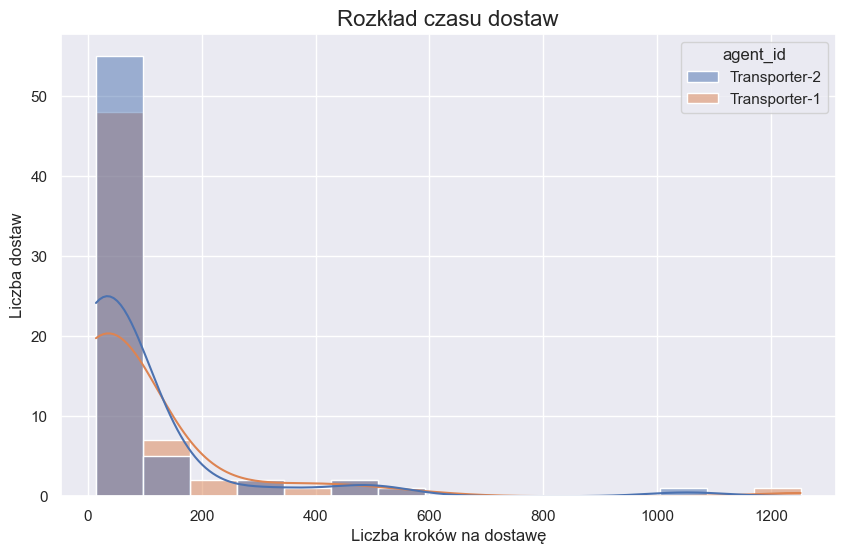

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_deliveries, x="steps_taken", hue="agent_id", kde=True, bins=15)
plt.title("Rozkład czasu dostaw", fontsize=16)
plt.xlabel("Liczba kroków na dostawę")
plt.ylabel("Liczba dostaw")
plt.show()

### Wykres 5: Heatmapa ruchu na planszy

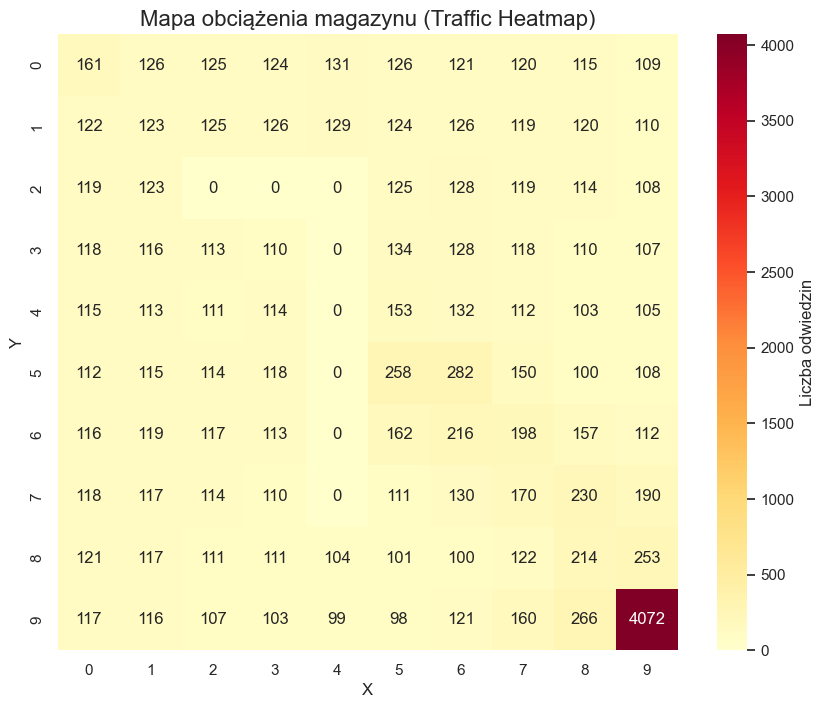

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_grid, annot=True, fmt='.0f', cmap="YlOrRd", cbar_kws={'label': 'Liczba odwiedzin'})

plt.title("Mapa obciążenia magazynu (Traffic Heatmap)", fontsize=16)
plt.xlabel("X")
plt.ylabel("Y")


plt.show()